In [1]:
import numpy as np
import pandas as pd 
% matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

# Exploring data

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int,
              'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float,
              'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str,
              'sqft_lot':int, 'view':int}
data = pd.read_csv("kc_house_data.csv", dtype=dtype_dict)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


Text(0.5,1,'Prices distribuation')

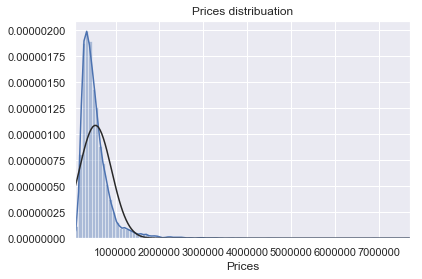

In [3]:
#explorining prices distributio
from scipy.stats import norm
plt.xlim((min(data['price'])-1000),(max(data['price'])+1000))
sns.distplot(data.price, bins = 100, kde=True, fit=norm)
plt.xlabel('Prices')
plt.title('Prices distribuation')


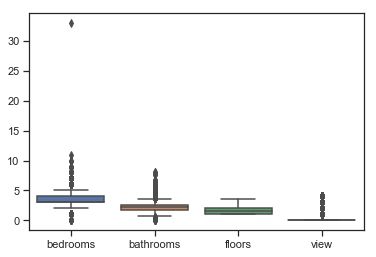

In [12]:
df = ['bedrooms', 'bathrooms', 'floors', 'view']
sns.set_style("ticks")
sns.boxplot(data=data[df])

In [5]:
def dis_plot(df, x,y):
    plt.xlim((min(df[x])),(max(df[x])))
    plot = sns.distplot(y, bins = 100, kde=True, fit=norm)
    #plt.xlabel('Prices')
    #plt.title('Prices distribuation')
    return plot

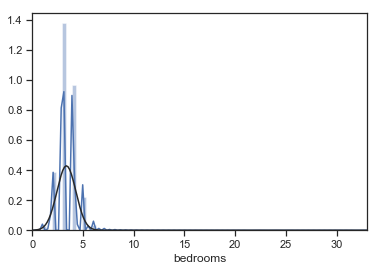

In [6]:
dis_plot(data,'bedrooms', data.bedrooms)

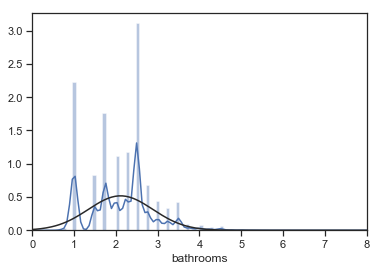

In [7]:
dis_plot(data,'bathrooms', data.bathrooms)

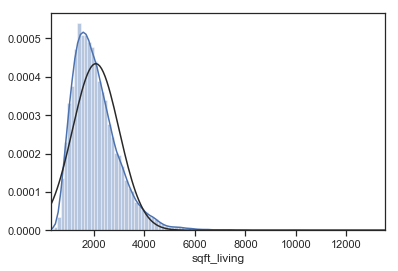

In [8]:
dis_plot(data,'sqft_living', data.sqft_living)

### Correlation Matrix Plot

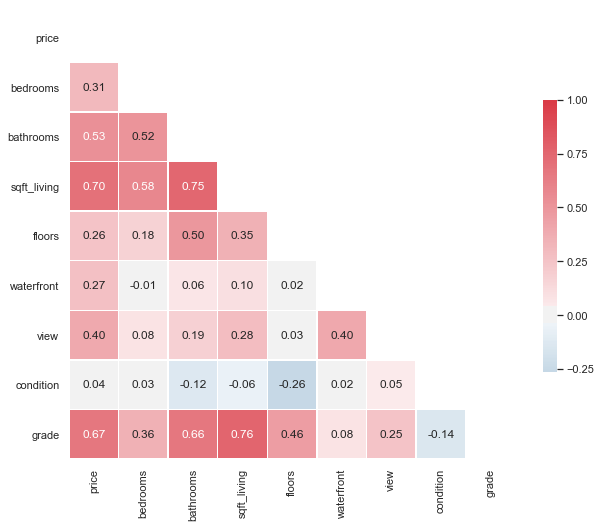

In [9]:
df_1 = ['price', 'bedrooms', 'bathrooms', 'sqft_living','floors', 'waterfront', 'view', 'condition', 'grade']
data_1 = data[df_1]
corr = data_1.corr()
sns.set(style='white')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=colormap, annot=True, fmt=".2f",center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Scatterplot Matrix

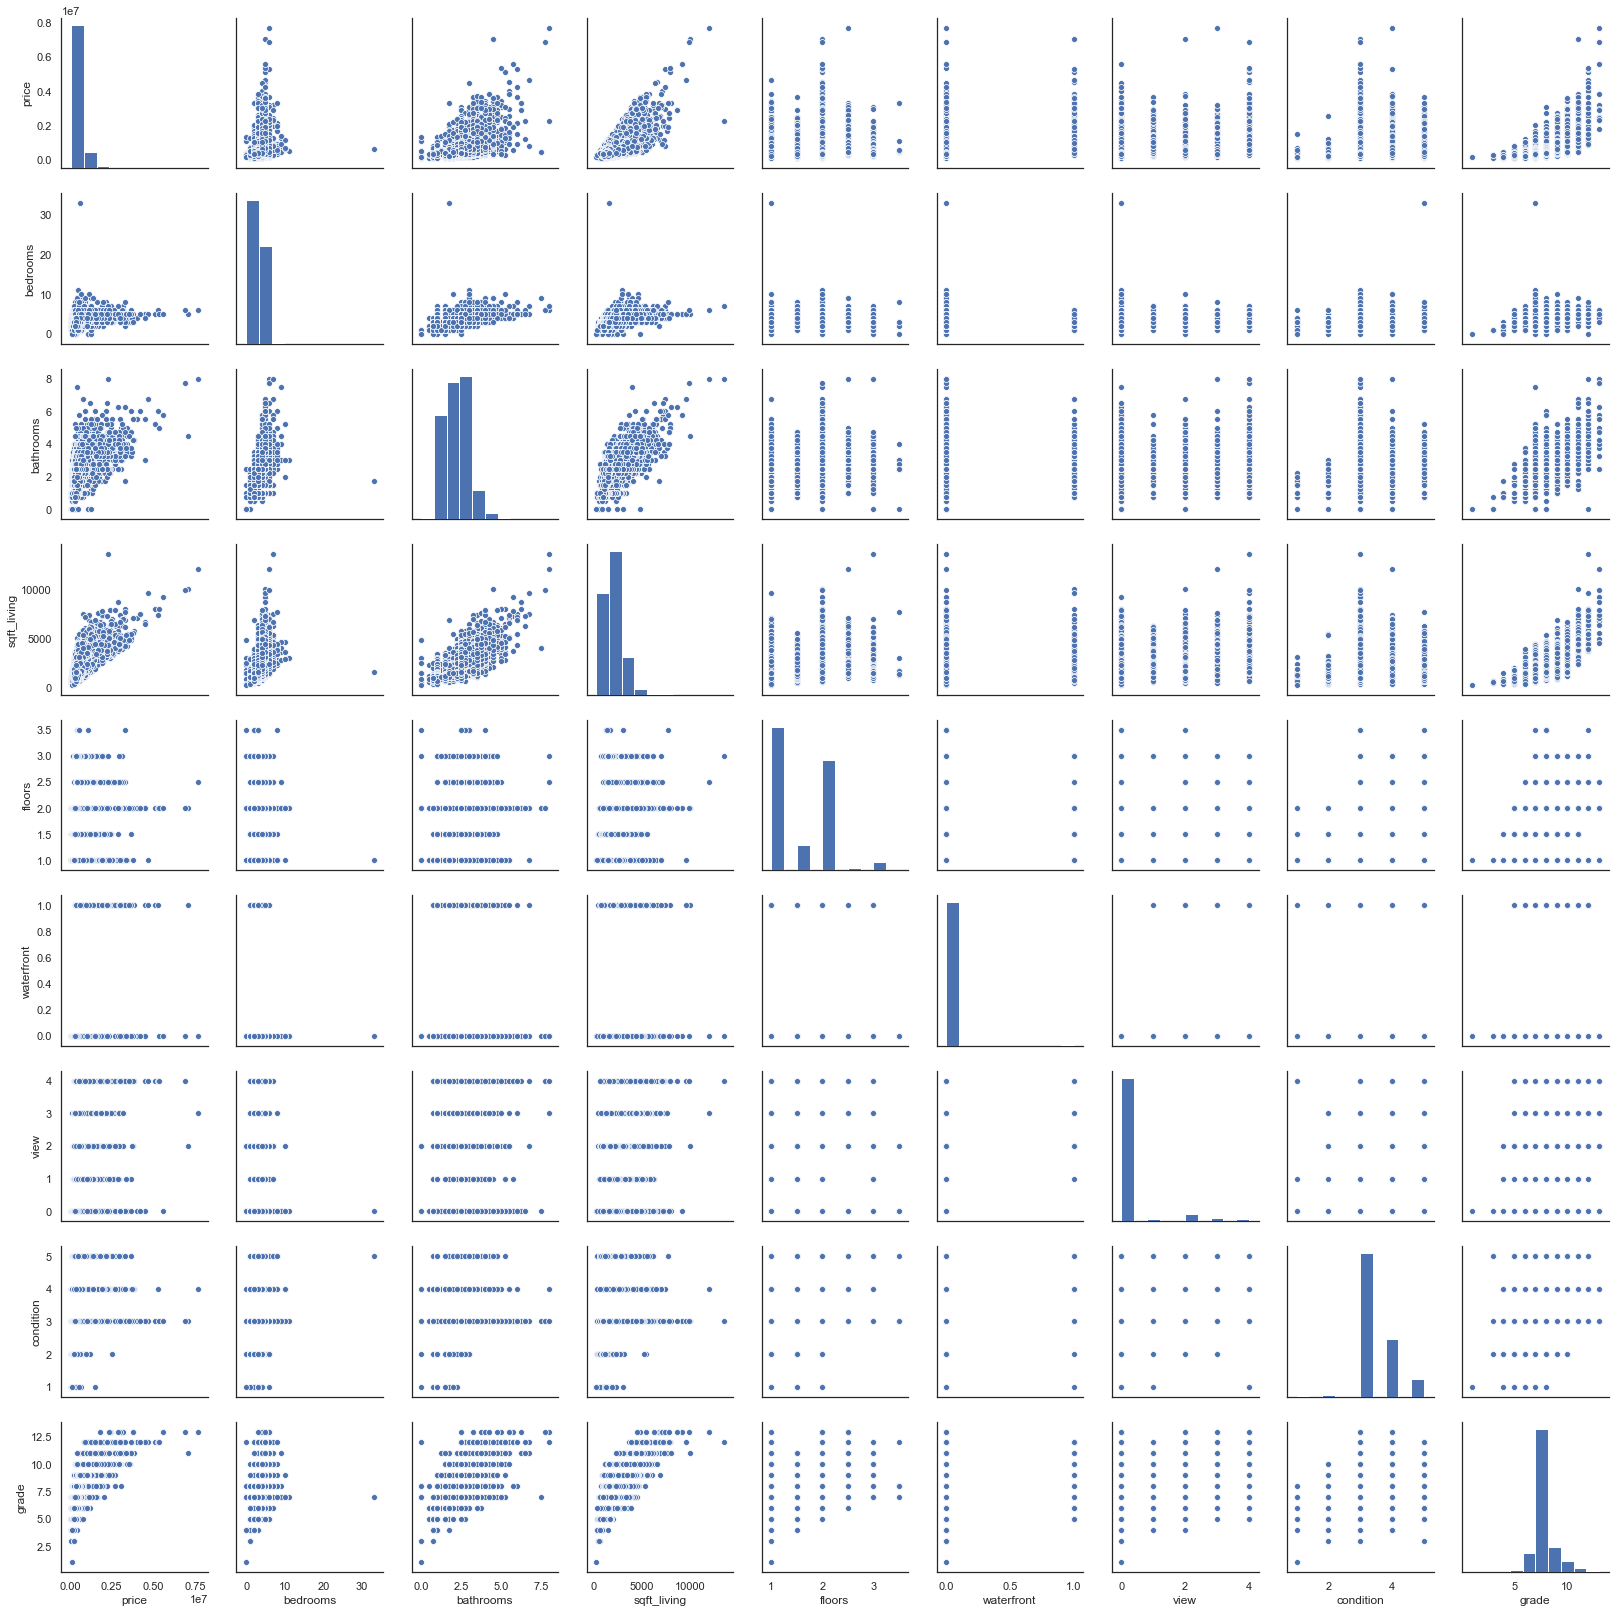

In [10]:
sns.pairplot(data_1)

In [11]:
features = ['sqft_living', 'bathrooms','view', 'bedrooms', 'grade']